In [27]:
import networkx as nx
import numpy as np
import scipy.sparse as sparse
import os, sys
import random
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
init_matrix = sparse.csr_matrix([[0.99, 0.26], [0.26, 0.53]])

In [29]:
current_matrix = init_matrix
for i in range(11):
    current_matrix = sparse.kron(current_matrix, init_matrix)

In [30]:
current_matrix.shape

(4096, 4096)

In [31]:
current_arr = current_matrix.toarray()

In [32]:
graph_arr = np.zeros((4096,4096))

In [33]:
graph_arr.shape

(4096, 4096)

In [34]:
for i in xrange(len(current_arr)):
    for j in xrange(len(current_arr)):
        if random.random() < current_arr[i,j]:
            graph_arr[i,j] = 1

In [35]:
kronecker = nx.from_numpy_matrix(graph_arr)

In [36]:
print "Kronecker graph is connected: ", nx.is_connected(kronecker)

Kronecker graph is connected:  False


In [70]:
gcc_kron = max(nx.connected_component_subgraphs(kronecker), key=len)

In [71]:
type(gcc_kron)

networkx.classes.graph.Graph

In [73]:
gcc_num_nodes = gcc_kron.number_of_nodes()
print "Number of nodes in Giant Connected component of Kronecker: ",gcc_num_nodes

Number of nodes in Giant Connected component of Kronecker:  3012


### => Observation: No, the GCC of Kronecker matrix does not have nodes of the order of $\theta(n)$

### Comparing Kronecker with real Arxiv graph

In [53]:
dir_path = os.getcwd()
arxiv = nx.read_edgelist(dir_path+'/data/CA-GrQc.txt')

#### Comparing distribution of connected components

In [55]:
cc_kron = nx.connected_components(kronecker)
len_cc_kron = [len(item) for item in cc_kron]
x_cron, y_cron = zip(*Counter(len_cc_kron).items())

In [56]:
cc = nx.connected_components(arxiv)
len_cc = [len(item) for item in cc]
x, y = zip(*Counter(len_cc).items())

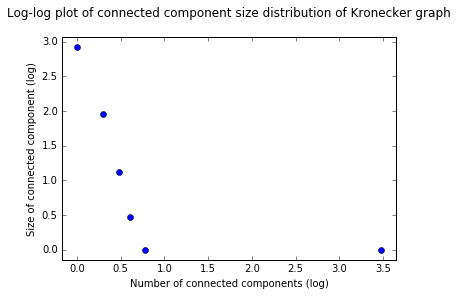

In [59]:
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(np.log10(x_cron), np.log10(y_cron), marker='o', linestyle='None')
plt.ylabel("Size of connected component (log)")
plt.xlabel("Number of connected components (log)")
plt.title("Log-log plot of connected component size distribution of Kronecker graph\n")
plt.show()

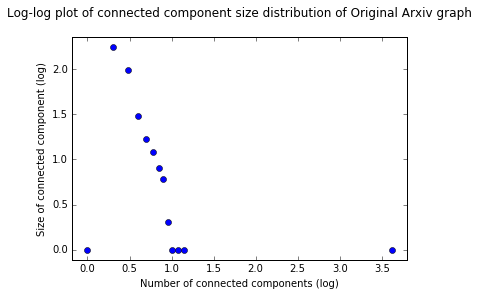

In [60]:
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(np.log10(x), np.log10(y), marker='o', linestyle='None')
plt.ylabel("Size of connected component (log)")
plt.xlabel("Number of connected components (log)")
plt.title("Log-log plot of connected component size distribution of Original Arxiv graph\n")
plt.show()

Conclusion:
Thus, TODO

#### Comparing degree distribution:

In [65]:
degrees = {}
for n in arxiv.nodes():
    degree_n = arxiv.degree(n)
    if degree_n not in degrees:
        degrees[degree_n] = 0
    degrees[degree_n] += 1

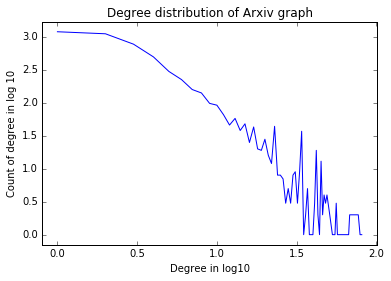

In [66]:
items = sorted(degrees.items())
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot([np.log10(k) for (k,v) in items], [np.log10(v) for (k,v) in items])
plt.xlabel("Degree in log10")
plt.ylabel("Count of degree in log 10")
plt.title("Degree distribution of Arxiv graph")

In [68]:
degrees_kron = {}
for n in kronecker.nodes():
    degree_n = kronecker.degree(n)
    if degree_n not in degrees_kron:
        degrees_kron[degree_n] = 0
    degrees_kron[degree_n] += 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


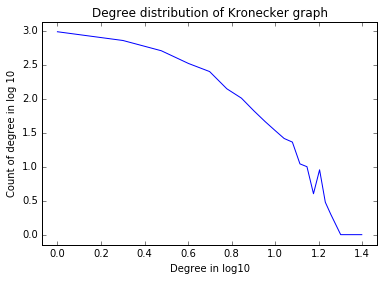

In [69]:
items = sorted(degrees_kron.items())
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot([np.log10(k) for (k,v) in items], [np.log10(v) for (k,v) in items])
plt.xlabel("Degree in log10")
plt.ylabel("Count of degree in log 10")
plt.title("Degree distribution of Kronecker graph")

Conclusion:
Thus, TODO

#### Comparing triangle distribution of GCC of both graphs

In [74]:
gcc = gcc = max(nx.connected_component_subgraphs(arxiv), key=len)
triangles = nx.triangles(gcc)
triangle_count = {}
values = triangles.values()
for val in values:
    if val not in triangle_count:
        triangle_count[val] = 0
    triangle_count[val] += 1

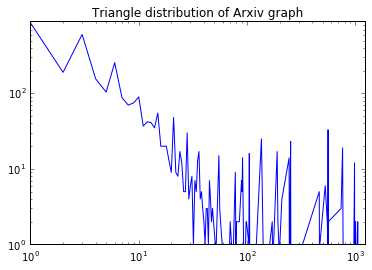

In [79]:
triangle_items = sorted(triangle_count.items())
fig, ax = plt.subplots()
ax.plot([k for (k,v) in triangle_items], [v for (k,v) in triangle_items])
ax.set_xscale('log')
ax.set_yscale('log')
ax.margins(0.05)
plt.title("Triangle distribution of Arxiv graph")

In [80]:
triangles_kron = nx.triangles(gcc_kron)
triangle_count_kron = {}
values = triangles_kron.values()
for val in values:
    if val not in triangle_count_kron:
        triangle_count_kron[val] = 0
    triangle_count_kron[val] += 1

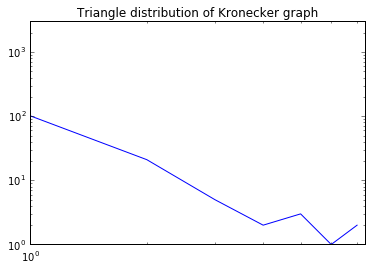

In [81]:
triangle_items_kron = sorted(triangle_count_kron.items())
fig, ax = plt.subplots()
ax.plot([k for (k,v) in triangle_items_kron], [v for (k,v) in triangle_items_kron])
ax.set_xscale('log')
ax.set_yscale('log')
ax.margins(0.05)
plt.title("Triangle distribution of Kronecker graph")

#### Comparing clustering co-efficient:

In [84]:
clus_coef = nx.average_clustering(arxiv)
clus_coef_kron = nx.average_clustering(kronecker)

In [85]:
print "Clustering co-efficient of Arxiv graph: ", clus_coef
print "Clustering co-efficient of Kronecker graph: ", clus_coef_kron

Clustering co-efficient of Arxiv graph:  0.529635811052
Clustering co-efficient of Kronecker graph:  0.00278825366545
